In [170]:
import pandas as pd
import numpy as np
import datetime

In [171]:
pwd

'C:\\Users\\DELL-IN\\Downloads\\Video\\AL\\Data Science Final Projects\\Start\\2. NGO-FUND RAISING ATTRITION- CLASSIFICATION\\1 - Data for Churn Modeling'

In [172]:
cd "C:\Users\DELL-IN\Downloads\Video\AL\Data Science Final Projects\Start\2. NGO-FUND RAISING ATTRITION- CLASSIFICATION\1 - Data for Churn Modeling"

C:\Users\DELL-IN\Downloads\Video\AL\Data Science Final Projects\Start\2. NGO-FUND RAISING ATTRITION- CLASSIFICATION\1 - Data for Churn Modeling


In [173]:
comclas=pd.read_sas('comclas.sas7bdat',encoding='utf-8')
commaint=pd.read_sas('commaint.sas7bdat',encoding='utf-8')
commediu=pd.read_sas('commediu.sas7bdat',encoding='utf-8')
communication=pd.read_sas('communication.sas7bdat',encoding='latin-1')
extrel=pd.read_sas('extrel.sas7bdat',encoding='latin-1')
extrelty=pd.read_sas('extrelty.sas7bdat',encoding='utf-8')
nameaddr=pd.read_sas('nameaddr.sas7bdat',encoding='latin-1')
payhistory=pd.read_sas('payhistory.sas7bdat',encoding='latin-1')

In [174]:
comclas

,CLASCODE,CLASDESC
0,CT,CTS-item
1,RI,Request for information
2,CM,Complaint
3,TA,Threath / Accusation
4,AK,Acknowledgement
5,RM,Reminder
6,ID,Information delivery
7,AN,Answer


In [175]:
commaint

,MNTOPCODE,MNTOPDESC
0,CAN,Cancellations/replacements
1,DIS,Discontinuations
2,MKT,Marketing - Enquiries
3,GEN,General
4,NEW,New relations
5,PRO,Projects
6,MFC,"Mail met FC, klachten en info"
7,SPC,Special Forms
8,INF,information about Plan
9,ENR,Enrollment


In [176]:
commediu.head()

,MEDIUMCODE,MEDIUMDESC
0,FF,Face to Face contact
1,FX,Fax
2,TX,Telex
3,EM,Electronic Mail
4,TE,Telephone call


In [177]:
communication.head()

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
0,000405402,CI,CTS,CT,0000020,O,1994-05-09
1,000430904,CI,CTS,CT,0000020,O,1994-06-14
2,000592732,CI,CTS,CT,0000020,O,1994-10-21
3,000593375,CI,CTS,CT,0000020,O,1994-10-21
4,000618514,CI,CTS,CT,0000020,O,1994-11-28


In [178]:
extrel.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
0,0026414,CT,1995-02-02,NaT
1,0026419,FP,1992-03-01,NaT
2,0026424,FP,1992-03-01,1996-12-24
3,0026430,FP,1992-03-01,2006-01-31
4,0026430,CT,1997-03-07,NaT


In [179]:
extrel.to_csv('extrel.csv')

In [180]:
extrelty.head()

,EXRELACTCD,EXRELACTDE
0,FP,CommitmentDo
1,PS,Prospect
2,PF,Prosp Fundra
3,PP,Prosp Promot
4,GR,Grantor


In [181]:
nameaddr.head()

,EXTRELNO,NAME1TITLE,POSTCODE,LANGUACODE
0,0000019,HR,2500,NL
1,0000020,HR,9550,NL
2,0000035,HM,2150,NL
3,0000042,FA,3012,NL
4,0000043,MW,3000,NL


In [182]:
payhistory.head()

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
0,38.0,1993-12-31,9.57,0000019,X,CO
1,39.0,1993-12-31,41.32,0000020,X,CO
2,40.0,1993-12-31,13.10,0000020,X,CO
3,54091.0,1994-01-01,2.02,0000020,X,CO
4,104480.0,1994-05-19,0.50,0000020,D,OK


In [183]:
payhistory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205720 entries, 0 to 1205719
Data columns (total 6 columns):
PID          1205720 non-null float64
PDATE        1205720 non-null datetime64[ns]
PAMT         1205720 non-null float64
EXTRELNO     1205720 non-null object
PAYTYPECD    1187546 non-null object
STATUS       1205719 non-null object
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 55.2+ MB


In [184]:
payhistory_real=payhistory[payhistory['STATUS']=='OK']

In [185]:
payhistory_real.head()

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
4,104480.0,1994-05-19,0.5,0000020,D,OK
5,128703.0,1994-06-14,0.5,0000020,D,OK
6,151581.0,1994-07-05,0.5,0000020,D,OK
7,182688.0,1994-08-15,0.5,0000020,D,OK
8,210468.0,1994-09-23,0.5,0000020,D,OK


dummies of PAYTYPECD

In [186]:
col_dummies=pd.get_dummies(payhistory_real['PAYTYPECD'], prefix='PAYTYPECD')
payhistory_real_df = pd.concat([payhistory_real, col_dummies ], axis=1)
payhistory_real_df.drop( ['PAYTYPECD'], axis = 1, inplace = True )

In [187]:
payhistory_real_df.head()

,PID,PDATE,PAMT,EXTRELNO,STATUS,PAYTYPECD_D,PAYTYPECD_E,PAYTYPECD_O,PAYTYPECD_X
4,104480.0,1994-05-19,0.5,0000020,OK,1,0,0,0
5,128703.0,1994-06-14,0.5,0000020,OK,1,0,0,0
6,151581.0,1994-07-05,0.5,0000020,OK,1,0,0,0
7,182688.0,1994-08-15,0.5,0000020,OK,1,0,0,0
8,210468.0,1994-09-23,0.5,0000020,OK,1,0,0,0


In [188]:
payhistory_real_df['PDATE'] = pd.to_datetime(payhistory_real_df['PDATE'])

Grouping Payhistory by Extrelno and defining framework for new KPI

In [189]:
payhistory_by_extrel = payhistory_real_df[['EXTRELNO','PDATE','PAMT','PID','PAYTYPECD_D','PAYTYPECD_E', 'PAYTYPECD_O', 'PAYTYPECD_X']].groupby(['EXTRELNO']).agg({'PID':'count', 'PDATE' :'max', 'PAYTYPECD_D':'sum', 'PAYTYPECD_E':'sum', 'PAYTYPECD_O':'sum', 'PAYTYPECD_X':'sum',  'PAMT': 'sum'}).rename(columns={'PID':'No_of_Payment', 'PDATE': 'Last_Payment_Date' , 'PAYTYPECD_D':'Count_Of_Permanent_Order', 'PAYTYPECD_E':'Count_Of_Own_Initiative', 'PAYTYPECD_O':'Count_Of_Bank_Transfer', 'PAYTYPECD_X':'Count_Of_Unknown_Paytypecd', 'PAMT': 'SUM_OF_PAMT'}).reset_index()

In [190]:
payhistory_by_extrel.head()

,EXTRELNO,No_of_Payment,Last_Payment_Date,Count_Of_Permanent_Order,Count_Of_Own_Initiative,Count_Of_Bank_Transfer,Count_Of_Unknown_Paytypecd,SUM_OF_PAMT
0,0000020,153,2007-01-17,153.0,0,0.0,0,3120.53
1,0000035,153,2007-01-17,153.0,0,0.0,0,3120.53
2,0000042,81,2001-01-12,81.0,0,0.0,0,1507.92
3,0000043,221,2003-07-14,221.0,0,0.0,0,4284.73
4,0000060,69,1999-12-07,69.0,0,0.0,0,1263.96


KPI - Frequency

In [191]:
payhistory_by_extrel.rename(columns={'No_of_Payment' : 'Frequency'}, inplace = True)

KPI - Recency

In [192]:
from datetime import datetime 
a = datetime.now()
payhistory_by_extrel['Recency'] = payhistory_by_extrel['Last_Payment_Date'].apply(lambda x: (a - x).days)

KPI - Total and average donation per donor

In [193]:
payhistory_by_extrel['Avg_Donation'] = payhistory_by_extrel['SUM_OF_PAMT']/payhistory_by_extrel['Frequency']

In [194]:
payhistory_by_extrel.rename(columns={'SUM_OF_PAMT' : 'Total_Donation'}, inplace = True)

Droping redundant columns and dtypes

In [195]:
payhistory_by_extrel.drop('Last_Payment_Date', axis=1, inplace = True)

In [196]:
payhistory_by_extrel[['Count_Of_Unknown_Paytypecd', 'Count_Of_Bank_Transfer', 'Count_Of_Own_Initiative', 'Count_Of_Permanent_Order', ]] = payhistory_by_extrel[[ 'Count_Of_Unknown_Paytypecd', 'Count_Of_Bank_Transfer', 'Count_Of_Own_Initiative', 'Count_Of_Permanent_Order' ]].astype('int64')

In [197]:
payhistory_by_extrel.head()

,EXTRELNO,Frequency,Count_Of_Permanent_Order,Count_Of_Own_Initiative,Count_Of_Bank_Transfer,Count_Of_Unknown_Paytypecd,Total_Donation,Recency,Avg_Donation
0,0000020,153,153,0,0,0,3120.53,4378,20.395621
1,0000035,153,153,0,0,0,3120.53,4378,20.395621
2,0000042,81,81,0,0,0,1507.92,6574,18.616296
3,0000043,221,221,0,0,0,4284.73,5661,19.387919
4,0000060,69,69,0,0,0,1263.96,6976,18.318261


In [198]:
payhistory_by_extrel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15174 entries, 0 to 15173
Data columns (total 9 columns):
EXTRELNO                      15174 non-null object
Frequency                     15174 non-null int64
Count_Of_Permanent_Order      15174 non-null int64
Count_Of_Own_Initiative       15174 non-null int64
Count_Of_Bank_Transfer        15174 non-null int64
Count_Of_Unknown_Paytypecd    15174 non-null int64
Total_Donation                15174 non-null float64
Recency                       15174 non-null int64
Avg_Donation                  15174 non-null float64
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ MB


now come to communication

In [199]:
communication.head()

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
0,000405402,CI,CTS,CT,0000020,O,1994-05-09
1,000430904,CI,CTS,CT,0000020,O,1994-06-14
2,000592732,CI,CTS,CT,0000020,O,1994-10-21
3,000593375,CI,CTS,CT,0000020,O,1994-10-21
4,000618514,CI,CTS,CT,0000020,O,1994-11-28


dummies for CONTDIREC and CLASCODE 

In [200]:
col_dummies1=pd.get_dummies(communication['CONTDIREC'], prefix='CONTDIREC')
col_dummies2=pd.get_dummies(communication['CLASCODE'], prefix='CLASCODE')
communication_df_new = pd.concat([communication, col_dummies1, col_dummies2], axis=1)
communication_df_new.drop( ['CONTDIREC', 'CLASCODE'], axis = 1, inplace = True )

In [201]:
communication_df_new.head()

,CONTID,MEDIUMCODE,MNTOPCODE,EXTRELNO,CONTDATE,CONTDIREC_I,CONTDIREC_O,CLASCODE_AK,CLASCODE_AN,CLASCODE_CM,CLASCODE_CT,CLASCODE_ID,CLASCODE_NS,CLASCODE_PM,CLASCODE_RI,CLASCODE_RM
0,000405402,CI,CTS,0000020,1994-05-09,0,1,0,0,0,1,0,0,0,0,0
1,000430904,CI,CTS,0000020,1994-06-14,0,1,0,0,0,1,0,0,0,0,0
2,000592732,CI,CTS,0000020,1994-10-21,0,1,0,0,0,1,0,0,0,0,0
3,000593375,CI,CTS,0000020,1994-10-21,0,1,0,0,0,1,0,0,0,0,0
4,000618514,CI,CTS,0000020,1994-11-28,0,1,0,0,0,1,0,0,0,0,0


want one per extrelno

In [202]:
communication_by_exrel = communication_df_new[['CONTID', 'EXTRELNO', 'CONTDIREC_I', 'CONTDIREC_O', 'CLASCODE_AK', 'CLASCODE_AN', 'CLASCODE_CM', 'CLASCODE_CT', 'CLASCODE_ID', 'CLASCODE_NS', 'CLASCODE_PM', 'CLASCODE_RI', 'CLASCODE_RM']].groupby(['EXTRELNO']).agg({'CONTID' :'count' , 'CONTDIREC_I' :'sum', 'CONTDIREC_O' :'sum', 'CLASCODE_AK' :'sum', 'CLASCODE_AN' :'sum', 'CLASCODE_CM' :'sum', 'CLASCODE_CT' :'sum', 'CLASCODE_ID' :'sum', 'CLASCODE_NS' :'sum', 'CLASCODE_PM' :'sum', 'CLASCODE_RI' :'sum', 'CLASCODE_RM':'sum'}).rename(columns={'CONTID' :'CONTID_CNT' , 'CONTDIREC_I' :'CONTDIREC_I_CNT', 'CONTDIREC_O' :'CONTDIREC_O_CNT', 'CLASCODE_AK' :'CLASCODE_AK_CNT', 'CLASCODE_AN' :'CLASCODE_AN_CNT', 'CLASCODE_CM' :'CLASCODE_CM_CNT', 'CLASCODE_CT' :'CLASCODE_CT_CNT', 'CLASCODE_ID' :'CLASCODE_ID_CNT', 'CLASCODE_NS' :'CLASCODE_NS_CNT', 'CLASCODE_PM' :'CLASCODE_PM_CNT', 'CLASCODE_RI' :'CLASCODE_RI_CNT', 'CLASCODE_RM':'CLASCODE_RM_CNT'}).reset_index()

In [203]:
communication_by_exrel.head()

,EXTRELNO,CONTID_CNT,CONTDIREC_I_CNT,CONTDIREC_O_CNT,CLASCODE_AK_CNT,CLASCODE_AN_CNT,CLASCODE_CM_CNT,CLASCODE_CT_CNT,CLASCODE_ID_CNT,CLASCODE_NS_CNT,CLASCODE_PM_CNT,CLASCODE_RI_CNT,CLASCODE_RM_CNT
0,0000020,53,0,53.0,0,1,0,33.0,18,0,1,0,0
1,0000035,61,2,59.0,1,1,0,38.0,20,0,1,0,0
2,0000042,36,1,35.0,0,1,0,24.0,9,0,0,1,1
3,0000043,112,4,108.0,1,7,0,83.0,18,0,1,2,0
4,0000060,36,2,34.0,0,3,0,22.0,10,0,0,1,0


Creating dummy to signify whether communication direction was ever incoming

In [204]:
def communicationtyp(communication_by_exrel):
    if ((communication_by_exrel.CONTDIREC_I_CNT  > 0) & (communication_by_exrel.CONTDIREC_O_CNT == 0)):
        return 'ONLY_IN'
    elif ((communication_by_exrel.CONTDIREC_I_CNT  == 0) & (communication_by_exrel.CONTDIREC_O_CNT > 0)):
        return 'ONLY_OUT'
    elif ((communication_by_exrel.CONTDIREC_I_CNT > 0) & (communication_by_exrel.CONTDIREC_O_CNT > 0)):
        return 'BOTH_IN_OUT'
    else:
        return 'NONE'

In [205]:
communication_by_exrel['COMMUNICATION_TYPE'] = communication_by_exrel.apply(communicationtyp, axis=1)

In [206]:
communication_by_exrel.rename(columns={'CONTID_CNT' : 'Total_No_Of_Communications'}, inplace = True)

In [207]:
communication_by_exrel.rename(columns={'CLASCODE_CM_CNT' : 'No_Of_Complaints'}, inplace = True)

In [208]:
communication_by_exrel['No_Of_Complaints'] = communication_by_exrel['No_Of_Complaints'].astype('int64')

Droping Redundant variables

In [209]:
communication_by_exrel.drop(['CONTDIREC_I_CNT', 'CONTDIREC_O_CNT', 'CLASCODE_AK_CNT', 'CLASCODE_AN_CNT', 'CLASCODE_CT_CNT', 'CLASCODE_ID_CNT', 'CLASCODE_NS_CNT', 'CLASCODE_PM_CNT', 'CLASCODE_RI_CNT', 'CLASCODE_RM_CNT' ], axis=1, inplace = True)

In [210]:
communication_by_exrel.head()

,EXTRELNO,Total_No_Of_Communications,No_Of_Complaints,COMMUNICATION_TYPE
0,0000020,53,0,ONLY_OUT
1,0000035,61,0,BOTH_IN_OUT
2,0000042,36,0,BOTH_IN_OUT
3,0000043,112,0,BOTH_IN_OUT
4,0000060,36,0,BOTH_IN_OUT


In [211]:
communication_by_exrel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21932 entries, 0 to 21931
Data columns (total 4 columns):
EXTRELNO                      21932 non-null object
Total_No_Of_Communications    21932 non-null int64
No_Of_Complaints              21932 non-null int64
COMMUNICATION_TYPE            21932 non-null object
dtypes: int64(2), object(2)
memory usage: 685.5+ KB


work with nameaddr(mailing language)

In [212]:
nameaddr.head()

,EXTRELNO,NAME1TITLE,POSTCODE,LANGUACODE
0,0000019,HR,2500,NL
1,0000020,HR,9550,NL
2,0000035,HM,2150,NL
3,0000042,FA,3012,NL
4,0000043,MW,3000,NL


In [213]:
nameaddr.count()

EXTRELNO      24186
NAME1TITLE    23593
POSTCODE      24034
LANGUACODE    24186
dtype: int64

In [214]:
nameaddr.nunique()

EXTRELNO      24186
NAME1TITLE        7
POSTCODE       1080
LANGUACODE        3
dtype: int64

In [215]:
nameaddr.groupby('LANGUACODE')['EXTRELNO'].nunique()

LANGUACODE
EN        6
FR     2743
NL    21437
Name: EXTRELNO, dtype: int64

In [216]:
get_dummies = pd.get_dummies(data=nameaddr['LANGUACODE'], prefix='LANGUACODE', drop_first=False)
nameaddr_by_exrel = pd.concat([nameaddr,get_dummies], axis=1)

In [217]:
nameaddr_by_exrel.drop(['LANGUACODE', 'NAME1TITLE','POSTCODE'], axis=1, inplace = True)

In [218]:
nameaddr_by_exrel[['LANGUACODE_FR', 'LANGUACODE_NL', 'LANGUACODE_EN']] = nameaddr_by_exrel[['LANGUACODE_FR', 'LANGUACODE_NL', 'LANGUACODE_EN']].astype('int64')

In [219]:
nameaddr_by_exrel.head()

,EXTRELNO,LANGUACODE_EN,LANGUACODE_FR,LANGUACODE_NL
0,0000019,0,0,1
1,0000020,0,0,1
2,0000035,0,0,1
3,0000042,0,0,1
4,0000043,0,0,1


time to merge the data

In [220]:
extrel_df_inter1 = pd.merge(extrel, communication_by_exrel, how='left', on=['EXTRELNO'])

In [221]:
extrel_df_inter2 = pd.merge(extrel_df_inter1, nameaddr_by_exrel, how='left', on=['EXTRELNO'])

In [222]:
extrel_df_final = pd.merge(extrel_df_inter2, payhistory_by_extrel, how='left', on=['EXTRELNO'])

In [223]:
extrel_df_final.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,Total_No_Of_Communications,No_Of_Complaints,COMMUNICATION_TYPE,LANGUACODE_EN,LANGUACODE_FR,LANGUACODE_NL,Frequency,Count_Of_Permanent_Order,Count_Of_Own_Initiative,Count_Of_Bank_Transfer,Count_Of_Unknown_Paytypecd,Total_Donation,Recency,Avg_Donation
0,0026414,CT,1995-02-02,NaT,57.0,0.0,BOTH_IN_OUT,0,0,1,153.0,153.0,0.0,0.0,0.0,3120.53,4378.0,20.395621
1,0026419,FP,1992-03-01,NaT,60.0,0.0,BOTH_IN_OUT,0,0,1,59.0,0.0,7.0,52.0,0.0,3385.40,4393.0,57.379661
2,0026424,FP,1992-03-01,1996-12-24,26.0,0.0,BOTH_IN_OUT,0,0,1,33.0,0.0,0.0,33.0,0.0,512.25,8045.0,15.522727
3,0026430,FP,1992-03-01,2006-01-31,61.0,1.0,BOTH_IN_OUT,0,0,1,140.0,137.0,0.0,3.0,0.0,2815.68,4834.0,20.112000
4,0026430,CT,1997-03-07,NaT,61.0,1.0,BOTH_IN_OUT,0,0,1,140.0,137.0,0.0,3.0,0.0,2815.68,4834.0,20.112000


In [224]:
extrel_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26689 entries, 0 to 26688
Data columns (total 18 columns):
EXTRELNO                      26689 non-null object
EXRELACTCD                    26689 non-null object
EXTRELSTDT                    26689 non-null datetime64[ns]
EXRELDATEN                    10168 non-null datetime64[ns]
Total_No_Of_Communications    25356 non-null float64
No_Of_Complaints              25356 non-null float64
COMMUNICATION_TYPE            25356 non-null object
LANGUACODE_EN                 26689 non-null int64
LANGUACODE_FR                 26689 non-null int64
LANGUACODE_NL                 26689 non-null int64
Frequency                     18460 non-null float64
Count_Of_Permanent_Order      18460 non-null float64
Count_Of_Own_Initiative       18460 non-null float64
Count_Of_Bank_Transfer        18460 non-null float64
Count_Of_Unknown_Paytypecd    18460 non-null float64
Total_Donation                18460 non-null float64
Recency                       18460 no

donors with commitment(FP) only

In [225]:
extrel_final_df = extrel_df_final[extrel_df_final.EXRELACTCD == 'FP']

Training data Time Window
Independent Window for Training data : 
        1989/01/01 - 2002/12/31
Dependent Window for Training data   :
        2003/01/01 - 2005/12/31


Testing data Time Window
Independent Window for Testing data  : 
        2003/01/01 - 2006/12/31
Dependent Window for Testing data    :
        2007/01/01 - 2007/12/31


Defination of Active customer :
Activity code = FP and start date before end of Independent Window and end date after start of Dependent Window  or missing End Date

In [226]:
import datetime 
fund_data_1989_2005 = extrel_final_df[(extrel_final_df['EXTRELSTDT']<= '2002-12-31')]

Getting the active data - with no end date

In [227]:
fund_data_active_1989_2005=fund_data_1989_2005[fund_data_1989_2005['EXRELDATEN'].isnull() == True]

Getting the churned data - with end date within the dependent window only

In [228]:
fund_data_churn_train = fund_data_1989_2005[(fund_data_1989_2005['EXRELDATEN']>= '2003-01-01') & (fund_data_1989_2005['EXRELDATEN']<= '2005-12-31')]

Dropping the rows with overlap - to get one row per EXTRELNO

In [229]:
churn_rel = fund_data_churn_train['EXTRELNO']

In [230]:
to_drop = fund_data_active_1989_2005[fund_data_active_1989_2005['EXTRELNO'].isin(churn_rel)]

duplicate customer

In [231]:
to_drop

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,Total_No_Of_Communications,No_Of_Complaints,COMMUNICATION_TYPE,LANGUACODE_EN,LANGUACODE_FR,LANGUACODE_NL,Frequency,Count_Of_Permanent_Order,Count_Of_Own_Initiative,Count_Of_Bank_Transfer,Count_Of_Unknown_Paytypecd,Total_Donation,Recency,Avg_Donation
22405,0227246,FP,2002-08-01,NaT,26.0,0.0,BOTH_IN_OUT,0,0,1,56.0,55.0,0.0,1.0,0.0,1463.32,4378.0,26.130714


In [232]:
fund_data_active_train = fund_data_active_1989_2005[~fund_data_active_1989_2005['EXTRELNO'].isin(churn_rel)]

Setting CHURN_IND - defining active and churned customer

In [233]:
fund_data_churn_train['CHURN_IND'] = 1

C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [234]:
fund_data_active_train['CHURN_IND'] = 0

C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Concatination of active and churned Training data 

In [235]:
frames = [fund_data_active_train, fund_data_churn_train]
train_df = pd.concat(frames)

In [236]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6313 entries, 1 to 23017
Data columns (total 19 columns):
EXTRELNO                      6313 non-null object
EXRELACTCD                    6313 non-null object
EXTRELSTDT                    6313 non-null datetime64[ns]
EXRELDATEN                    859 non-null datetime64[ns]
Total_No_Of_Communications    6313 non-null float64
No_Of_Complaints              6313 non-null float64
COMMUNICATION_TYPE            6313 non-null object
LANGUACODE_EN                 6313 non-null int64
LANGUACODE_FR                 6313 non-null int64
LANGUACODE_NL                 6313 non-null int64
Frequency                     6300 non-null float64
Count_Of_Permanent_Order      6300 non-null float64
Count_Of_Own_Initiative       6300 non-null float64
Count_Of_Bank_Transfer        6300 non-null float64
Count_Of_Unknown_Paytypecd    6300 non-null float64
Total_Donation                6300 non-null float64
Recency                       6300 non-null float64
Avg_

In [237]:
train_df.nunique()

EXTRELNO                      6313
EXRELACTCD                       1
EXTRELSTDT                     130
EXRELDATEN                     364
Total_No_Of_Communications     213
No_Of_Complaints                 9
COMMUNICATION_TYPE               2
LANGUACODE_EN                    1
LANGUACODE_FR                    2
LANGUACODE_NL                    2
Frequency                      257
Count_Of_Permanent_Order       226
Count_Of_Own_Initiative         42
Count_Of_Bank_Transfer         177
Count_Of_Unknown_Paytypecd       3
Total_Donation                2973
Recency                        530
Avg_Donation                  3282
CHURN_IND                        2
dtype: int64

Dropping redundant varibles
- We do not need start Date and End date becasue we have already defined the time window
- We will not need EXRELACTCD ; since it is "FP" for all

In [238]:
train_df.drop(['EXRELACTCD','EXTRELSTDT','EXRELDATEN','LANGUACODE_EN'], axis =1, inplace = True)

In [239]:
import pandas_profiling
pandas_profiling.ProfileReport(train_df)

Number of variables,16
Number of observations,6313
Total Missing (%),0.1%
Total size in memory,789.2 KiB
Average record size in memory,128.0 B
Numeric,11
Categorical,1
Boolean,2
Date,0
Text (Unique),1
Rejected,1


In [240]:
train_df[train_df['Count_Of_Unknown_Paytypecd'].isnull() == True]

,EXTRELNO,Total_No_Of_Communications,No_Of_Complaints,COMMUNICATION_TYPE,LANGUACODE_FR,LANGUACODE_NL,Frequency,Count_Of_Permanent_Order,Count_Of_Own_Initiative,Count_Of_Bank_Transfer,Count_Of_Unknown_Paytypecd,Total_Donation,Recency,Avg_Donation,CHURN_IND
2907,0037060,5.0,0.0,ONLY_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5364,0158182,7.0,0.0,ONLY_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16274,0204973,11.0,0.0,ONLY_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
21913,0225687,12.0,0.0,BOTH_IN_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
22667,0228158,11.0,0.0,BOTH_IN_OUT,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
22682,0228196,15.0,0.0,BOTH_IN_OUT,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
22807,0228636,8.0,0.0,BOTH_IN_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
22812,0228653,9.0,0.0,BOTH_IN_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
22847,0228799,11.0,0.0,BOTH_IN_OUT,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
22868,0228880,12.0,0.0,ONLY_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


Dealing with Null Columns -
    There are 13 rows where customer is active but has no contribution within the selected timewindow.
    Replacing the count values to ZERO and Recency to highest Recency (Max)

In [241]:
train_df[['Count_Of_Unknown_Paytypecd', 'Total_Donation', 'Frequency', 'Count_Of_Bank_Transfer', 'Count_Of_Own_Initiative', 'Count_Of_Permanent_Order', 'Avg_Donation' ]] = train_df[['Count_Of_Unknown_Paytypecd', 'Total_Donation', 'Frequency', 'Count_Of_Bank_Transfer', 'Count_Of_Own_Initiative', 'Count_Of_Permanent_Order', 'Avg_Donation' ]].replace(np.nan, 0 , regex=True)

In [242]:
train_df['Recency'] = train_df['Recency'].replace(np.nan, train_df['Recency'].max() , regex=True)

Dealing With Categorical variable - COMMUNICATION_TYPE

Creating dummies and droping original variable

In [243]:
col_dummies=pd.get_dummies(train_df['COMMUNICATION_TYPE'], prefix='COMMUNICATION_TYPE')
train_df = pd.concat([train_df, col_dummies], axis=1)
train_df.drop( ['COMMUNICATION_TYPE'], axis = 1, inplace = True )

In [244]:
train_df[['COMMUNICATION_TYPE_BOTH_IN_OUT', 'COMMUNICATION_TYPE_ONLY_OUT', 'No_Of_Complaints','Total_No_Of_Communications', 'Count_Of_Unknown_Paytypecd',  'Frequency', 'Count_Of_Bank_Transfer', 'Count_Of_Own_Initiative', 'Count_Of_Permanent_Order', 'Recency']] = train_df[['COMMUNICATION_TYPE_BOTH_IN_OUT', 'COMMUNICATION_TYPE_ONLY_OUT', 'No_Of_Complaints','Total_No_Of_Communications', 'Count_Of_Unknown_Paytypecd',  'Frequency', 'Count_Of_Bank_Transfer', 'Count_Of_Own_Initiative', 'Count_Of_Permanent_Order', 'Recency']].astype('int64')

In [245]:
train_df[['Avg_Donation', 'Total_Donation']] = train_df[['Avg_Donation', 'Total_Donation']].round(2)

In [246]:
train_df.isnull().any()

EXTRELNO                          False
Total_No_Of_Communications        False
No_Of_Complaints                  False
LANGUACODE_FR                     False
LANGUACODE_NL                     False
Frequency                         False
Count_Of_Permanent_Order          False
Count_Of_Own_Initiative           False
Count_Of_Bank_Transfer            False
Count_Of_Unknown_Paytypecd        False
Total_Donation                    False
Recency                           False
Avg_Donation                      False
CHURN_IND                         False
COMMUNICATION_TYPE_BOTH_IN_OUT    False
COMMUNICATION_TYPE_ONLY_OUT       False
dtype: bool

In [247]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6313 entries, 1 to 23017
Data columns (total 16 columns):
EXTRELNO                          6313 non-null object
Total_No_Of_Communications        6313 non-null int64
No_Of_Complaints                  6313 non-null int64
LANGUACODE_FR                     6313 non-null int64
LANGUACODE_NL                     6313 non-null int64
Frequency                         6313 non-null int64
Count_Of_Permanent_Order          6313 non-null int64
Count_Of_Own_Initiative           6313 non-null int64
Count_Of_Bank_Transfer            6313 non-null int64
Count_Of_Unknown_Paytypecd        6313 non-null int64
Total_Donation                    6313 non-null float64
Recency                           6313 non-null int64
Avg_Donation                      6313 non-null float64
CHURN_IND                         6313 non-null int64
COMMUNICATION_TYPE_BOTH_IN_OUT    6313 non-null int64
COMMUNICATION_TYPE_ONLY_OUT       6313 non-null int64
dtypes: float64(2), int

Preparing the Test Data
Getting data that has start date before the the end of Independent window (2003/01/01 - 2006/12/31) 
and end date after the start of dependent window (2007/01/01 - END)

In [248]:
import datetime 
fund_data_2003_2007 = extrel_final_df[(extrel_final_df['EXTRELSTDT'] >= '2003-01-01') & (extrel_final_df['EXTRELSTDT'] <= '2006-12-31')]

In [249]:
fund_data_2003_2007.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,Total_No_Of_Communications,No_Of_Complaints,COMMUNICATION_TYPE,LANGUACODE_EN,LANGUACODE_FR,LANGUACODE_NL,Frequency,Count_Of_Permanent_Order,Count_Of_Own_Initiative,Count_Of_Bank_Transfer,Count_Of_Unknown_Paytypecd,Total_Donation,Recency,Avg_Donation
179,0027029,FP,2004-04-01,NaT,76.0,1.0,BOTH_IN_OUT,0,0,1,18.0,0.0,1.0,17.0,0.0,3894.98,4629.0,216.387778
841,0029468,FP,2003-07-01,NaT,109.0,0.0,BOTH_IN_OUT,0,0,1,266.0,0.0,21.0,245.0,0.0,5269.39,4373.0,19.809737
1108,0030559,FP,2004-02-01,2006-03-07,23.0,0.0,BOTH_IN_OUT,0,0,1,27.0,26.0,0.0,1.0,0.0,506.83,4889.0,18.771481
1579,0032313,FP,2005-03-01,NaT,264.0,0.0,BOTH_IN_OUT,0,0,1,64.0,0.0,1.0,63.0,0.0,14123.94,4597.0,220.686562
1841,0033178,FP,2003-12-01,2006-12-14,33.0,1.0,BOTH_IN_OUT,0,0,1,44.0,35.0,0.0,9.0,0.0,954.66,4418.0,21.696818


Getting the active data i.e. EXRELDATEN (end date) is not available

In [250]:
fund_data_active_2003_2007=fund_data_2003_2007[fund_data_2003_2007['EXRELDATEN'].isnull() == True]

Getting the churn data i.e. EXRELDATEN (end date) is available

In [251]:
fund_data_churn_test = fund_data_2003_2007[(fund_data_2003_2007['EXRELDATEN']>= '2007-01-01')]

Removing duplicates between churn and active datasets


In [252]:
churn_rel = fund_data_churn_test ['EXTRELNO']

In [253]:
to_drop = fund_data_active_2003_2007[fund_data_active_2003_2007['EXTRELNO'].isin(churn_rel)]

In [254]:
to_drop

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,Total_No_Of_Communications,No_Of_Complaints,COMMUNICATION_TYPE,LANGUACODE_EN,LANGUACODE_FR,LANGUACODE_NL,Frequency,Count_Of_Permanent_Order,Count_Of_Own_Initiative,Count_Of_Bank_Transfer,Count_Of_Unknown_Paytypecd,Total_Donation,Recency,Avg_Donation


In [255]:
fund_data_active_test = fund_data_active_2003_2007[~fund_data_active_2003_2007['EXTRELNO'].isin(churn_rel)]

Additing churn indicator for Active and Churn datasets

In [256]:
fund_data_active_test['CHURN_IND'] = 0

In [257]:
fund_data_churn_test['CHURN_IND'] = 1

C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Merge

In [258]:
frames = [fund_data_active_test, fund_data_churn_test ]
test_df = pd.concat(frames)

In [259]:
test_df.count()

EXTRELNO                      1569
EXRELACTCD                    1569
EXTRELSTDT                    1569
EXRELDATEN                      13
Total_No_Of_Communications    1569
No_Of_Complaints              1569
COMMUNICATION_TYPE            1569
LANGUACODE_EN                 1569
LANGUACODE_FR                 1569
LANGUACODE_NL                 1569
Frequency                     1552
Count_Of_Permanent_Order      1552
Count_Of_Own_Initiative       1552
Count_Of_Bank_Transfer        1552
Count_Of_Unknown_Paytypecd    1552
Total_Donation                1552
Recency                       1552
Avg_Donation                  1552
CHURN_IND                     1569
dtype: int64

In [260]:
test_df.nunique()

EXTRELNO                      1569
EXRELACTCD                       1
EXTRELSTDT                      48
EXRELDATEN                       6
Total_No_Of_Communications      83
No_Of_Complaints                 2
COMMUNICATION_TYPE               2
LANGUACODE_EN                    1
LANGUACODE_FR                    2
LANGUACODE_NL                    2
Frequency                       72
Count_Of_Permanent_Order        68
Count_Of_Own_Initiative         30
Count_Of_Bank_Transfer          42
Count_Of_Unknown_Paytypecd       1
Total_Donation                 420
Recency                        139
Avg_Donation                   572
CHURN_IND                        2
dtype: int64

In [261]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1569 entries, 179 to 26405
Data columns (total 19 columns):
EXTRELNO                      1569 non-null object
EXRELACTCD                    1569 non-null object
EXTRELSTDT                    1569 non-null datetime64[ns]
EXRELDATEN                    13 non-null datetime64[ns]
Total_No_Of_Communications    1569 non-null float64
No_Of_Complaints              1569 non-null float64
COMMUNICATION_TYPE            1569 non-null object
LANGUACODE_EN                 1569 non-null int64
LANGUACODE_FR                 1569 non-null int64
LANGUACODE_NL                 1569 non-null int64
Frequency                     1552 non-null float64
Count_Of_Permanent_Order      1552 non-null float64
Count_Of_Own_Initiative       1552 non-null float64
Count_Of_Bank_Transfer        1552 non-null float64
Count_Of_Unknown_Paytypecd    1552 non-null float64
Total_Donation                1552 non-null float64
Recency                       1552 non-null float64
Avg

In [262]:
test_df.drop(['EXRELACTCD','EXTRELSTDT','EXRELDATEN', 'LANGUACODE_EN'], axis =1, inplace = True)

In [263]:
test_df[test_df['Count_Of_Unknown_Paytypecd'].isnull() == True]

,EXTRELNO,Total_No_Of_Communications,No_Of_Complaints,COMMUNICATION_TYPE,LANGUACODE_FR,LANGUACODE_NL,Frequency,Count_Of_Permanent_Order,Count_Of_Own_Initiative,Count_Of_Bank_Transfer,Count_Of_Unknown_Paytypecd,Total_Donation,Recency,Avg_Donation,CHURN_IND
13832,0196729,2.0,0.0,ONLY_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
24688,0235523,3.0,0.0,BOTH_IN_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
25061,0236966,2.0,0.0,ONLY_OUT,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
25241,0237647,2.0,0.0,ONLY_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
26261,0242475,3.0,0.0,BOTH_IN_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
26328,0242851,5.0,0.0,BOTH_IN_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
26510,0243968,3.0,0.0,BOTH_IN_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
26544,0244139,4.0,0.0,ONLY_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
26549,0244174,3.0,0.0,BOTH_IN_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
26553,0244209,2.0,0.0,ONLY_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Dealing with Null values
    
    There are 17 rows in test dataset where the customer is active but do not have any payment between the given date range
    
    Hence replacing counts by ZERO and Recency to max value

In [264]:
test_df[['Count_Of_Unknown_Paytypecd', 'Total_Donation', 'Frequency', 'Count_Of_Bank_Transfer', 'Count_Of_Own_Initiative', 'Count_Of_Permanent_Order', 'Avg_Donation' ]] = test_df[['Count_Of_Unknown_Paytypecd', 'Total_Donation', 'Frequency', 'Count_Of_Bank_Transfer', 'Count_Of_Own_Initiative', 'Count_Of_Permanent_Order', 'Avg_Donation' ]].replace(np.nan, 0 , regex=True)

In [265]:
test_df['Recency'] = test_df['Recency'].replace(np.nan, test_df['Recency'].max() , regex=True)

Dealing With Categorical variable - COMMUNICATION_TYPE

Creating dummies and droping original variable

In [266]:
col_dummies=pd.get_dummies(test_df['COMMUNICATION_TYPE'], prefix='COMMUNICATION_TYPE')
test_df = pd.concat([test_df, col_dummies], axis=1)
test_df.drop( ['COMMUNICATION_TYPE'], axis = 1, inplace = True )

In [267]:
test_df[['COMMUNICATION_TYPE_BOTH_IN_OUT', 'COMMUNICATION_TYPE_ONLY_OUT', 'No_Of_Complaints','Total_No_Of_Communications', 'Count_Of_Unknown_Paytypecd',  'Frequency', 'Count_Of_Bank_Transfer', 'Count_Of_Own_Initiative', 'Count_Of_Permanent_Order', 'Recency']] = test_df[['COMMUNICATION_TYPE_BOTH_IN_OUT', 'COMMUNICATION_TYPE_ONLY_OUT', 'No_Of_Complaints','Total_No_Of_Communications', 'Count_Of_Unknown_Paytypecd',  'Frequency', 'Count_Of_Bank_Transfer', 'Count_Of_Own_Initiative', 'Count_Of_Permanent_Order', 'Recency']].astype('int64')

In [268]:
test_df[['Avg_Donation', 'Total_Donation']] = test_df[['Avg_Donation', 'Total_Donation']].round(2)

In [269]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1569 entries, 179 to 26405
Data columns (total 16 columns):
EXTRELNO                          1569 non-null object
Total_No_Of_Communications        1569 non-null int64
No_Of_Complaints                  1569 non-null int64
LANGUACODE_FR                     1569 non-null int64
LANGUACODE_NL                     1569 non-null int64
Frequency                         1569 non-null int64
Count_Of_Permanent_Order          1569 non-null int64
Count_Of_Own_Initiative           1569 non-null int64
Count_Of_Bank_Transfer            1569 non-null int64
Count_Of_Unknown_Paytypecd        1569 non-null int64
Total_Donation                    1569 non-null float64
Recency                           1569 non-null int64
Avg_Donation                      1569 non-null float64
CHURN_IND                         1569 non-null int64
COMMUNICATION_TYPE_BOTH_IN_OUT    1569 non-null int64
COMMUNICATION_TYPE_ONLY_OUT       1569 non-null int64
dtypes: float64(2), i

We have now cleaned TEST Data as test_df and cleaned TRAIN Data as train_df

Training datsaet will be used to establish the model 

Testing dataset will be used to validate/establish the model

In [270]:
train_df.count()

EXTRELNO                          6313
Total_No_Of_Communications        6313
No_Of_Complaints                  6313
LANGUACODE_FR                     6313
LANGUACODE_NL                     6313
Frequency                         6313
Count_Of_Permanent_Order          6313
Count_Of_Own_Initiative           6313
Count_Of_Bank_Transfer            6313
Count_Of_Unknown_Paytypecd        6313
Total_Donation                    6313
Recency                           6313
Avg_Donation                      6313
CHURN_IND                         6313
COMMUNICATION_TYPE_BOTH_IN_OUT    6313
COMMUNICATION_TYPE_ONLY_OUT       6313
dtype: int64

In [271]:
test_df.count()

EXTRELNO                          1569
Total_No_Of_Communications        1569
No_Of_Complaints                  1569
LANGUACODE_FR                     1569
LANGUACODE_NL                     1569
Frequency                         1569
Count_Of_Permanent_Order          1569
Count_Of_Own_Initiative           1569
Count_Of_Bank_Transfer            1569
Count_Of_Unknown_Paytypecd        1569
Total_Donation                    1569
Recency                           1569
Avg_Donation                      1569
CHURN_IND                         1569
COMMUNICATION_TYPE_BOTH_IN_OUT    1569
COMMUNICATION_TYPE_ONLY_OUT       1569
dtype: int64

applying models

In [272]:
df_train = train_df.select_dtypes(include=['int64','float64']).copy()

In [273]:
df_test = test_df.select_dtypes(include=['int64','float64']).copy()

In [274]:
df_train.count()

Total_No_Of_Communications        6313
No_Of_Complaints                  6313
LANGUACODE_FR                     6313
LANGUACODE_NL                     6313
Frequency                         6313
Count_Of_Permanent_Order          6313
Count_Of_Own_Initiative           6313
Count_Of_Bank_Transfer            6313
Count_Of_Unknown_Paytypecd        6313
Total_Donation                    6313
Recency                           6313
Avg_Donation                      6313
CHURN_IND                         6313
COMMUNICATION_TYPE_BOTH_IN_OUT    6313
COMMUNICATION_TYPE_ONLY_OUT       6313
dtype: int64

In [275]:
df_test.count()

Total_No_Of_Communications        1569
No_Of_Complaints                  1569
LANGUACODE_FR                     1569
LANGUACODE_NL                     1569
Frequency                         1569
Count_Of_Permanent_Order          1569
Count_Of_Own_Initiative           1569
Count_Of_Bank_Transfer            1569
Count_Of_Unknown_Paytypecd        1569
Total_Donation                    1569
Recency                           1569
Avg_Donation                      1569
CHURN_IND                         1569
COMMUNICATION_TYPE_BOTH_IN_OUT    1569
COMMUNICATION_TYPE_ONLY_OUT       1569
dtype: int64

In [276]:
feature_columns = df_train.columns.difference( ['CHURN_IND'] )

In [277]:
from sklearn.cross_validation import train_test_split


train_X, test_X, train_y, test_y = train_test_split(df_train[feature_columns],
                                                  df_train['CHURN_IND'],
                                                  test_size = 0.2,
                                                  random_state = 123 )

In [278]:
# Building Models
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_X, train_y )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [279]:
list( zip( feature_columns, logreg.coef_[0] ) )

[('Avg_Donation', -0.006337726688276824),
 ('COMMUNICATION_TYPE_BOTH_IN_OUT', -3.0570279092667882),
 ('COMMUNICATION_TYPE_ONLY_OUT', -3.824900683940529),
 ('Count_Of_Bank_Transfer', -0.1301880205924757),
 ('Count_Of_Own_Initiative', -0.40313943249601725),
 ('Count_Of_Permanent_Order', -0.1610252890437113),
 ('Count_Of_Unknown_Paytypecd', -0.03165737745143319),
 ('Frequency', 0.15370826825733705),
 ('LANGUACODE_FR', -3.4069784717115565),
 ('LANGUACODE_NL', -3.4749501214957856),
 ('No_Of_Complaints', 0.10645993542004117),
 ('Recency', 0.0030419892812222488),
 ('Total_Donation', -0.0009083272829175658),
 ('Total_No_Of_Communications', 0.00545355660395669)]

In [280]:
#Predicting the test cases
fund_train_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } )

In [281]:
fund_train_pred = fund_train_pred.reset_index()

In [282]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( fund_train_pred.actual,
                            fund_train_pred.predicted, [1,0] )
cm

array([[ 152,   39],
       [   3, 1069]], dtype=int64)

In [283]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0.5,12.5,'Predicted label')

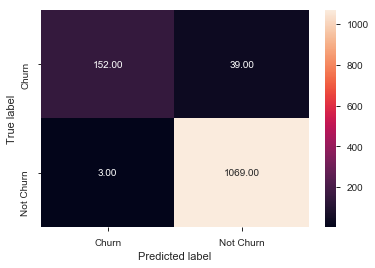

In [284]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Churn", "Not Churn"] , yticklabels = ["Churn", "Not Churn"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [285]:
score = metrics.accuracy_score( fund_train_pred.actual, fund_train_pred.predicted )
round( float(score), 2 )

0.97

In [324]:
auc_score = metrics.roc_auc_score( fund_train_pred.actual, fund_train_pred.predicted  )
round( float( auc_score ), 2 )

0.9

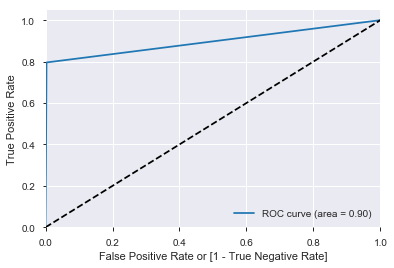

In [326]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( fund_train_pred.actual,
                                     fund_train_pred.predicted,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

logistics show 97% accuracy

In [286]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.grid_search import GridSearchCV

In [287]:
param_grid = {'max_depth': np.arange(3, 16),
             'max_features': np.arange(3,8)}

In [288]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10)
tree.fit( train_X, train_y )

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), 'max_features': array([3, 4, 5, 6, 7])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [289]:
tree.best_params_

{'max_depth': 6, 'max_features': 7}

In [290]:
tree.best_score_

0.9906930693069307

Building Final Decision Tree Model

In [291]:
train_X.head()

,Avg_Donation,COMMUNICATION_TYPE_BOTH_IN_OUT,COMMUNICATION_TYPE_ONLY_OUT,Count_Of_Bank_Transfer,Count_Of_Own_Initiative,Count_Of_Permanent_Order,Count_Of_Unknown_Paytypecd,Frequency,LANGUACODE_FR,LANGUACODE_NL,No_Of_Complaints,Recency,Total_Donation,Total_No_Of_Communications
10418,22.16,1,0,115,20,0,0,135,0,1,0,4385,2992.06,54
19348,22.67,1,0,1,0,80,0,81,0,1,0,4378,1836.23,39
12894,21.54,1,0,0,0,123,0,123,0,1,1,4378,2649.44,65
5572,20.33,1,0,122,20,0,0,142,0,1,0,4379,2886.86,56
2126,20.40,1,0,0,0,153,0,153,0,1,2,4378,3120.53,64


In [292]:
clf_tree = DecisionTreeClassifier( max_depth = 6, max_features=7 )
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [293]:
tree_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': clf_tree.predict( train_X ) } )

In [294]:
metrics.accuracy_score( tree_train_pred.actual, tree_train_pred.predicted )

0.996039603960396

Text(0.5,12.5,'Predicted label')

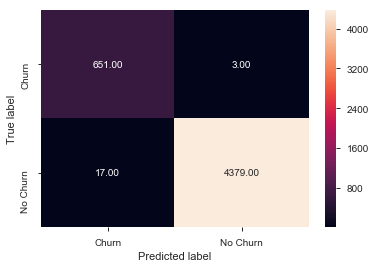

In [295]:
tree_cm = metrics.confusion_matrix( tree_train_pred.predicted,
                                 tree_train_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Churn", "No Churn"] , yticklabels = ["Churn", "No Churn"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

MODEL VALIDATION

In [296]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [297]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.9873317498020586

Text(0.5,12.5,'Predicted label')

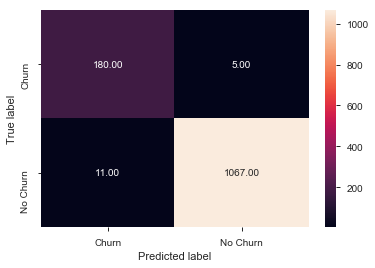

In [298]:
tree_cm_test = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm_test, annot=True,
         fmt='.2f',
         xticklabels = ["Churn", "No Churn"] , yticklabels = ["Churn", "No Churn"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

Decision tree gives 98%

BUILDING RANDOM FOREST MODEL TO GET THE PROBABILITY OF CHURN FOR CUSTOMERS

In [299]:
from sklearn.ensemble import RandomForestClassifier

In [300]:
clf = RandomForestClassifier(n_estimators=6)
clf.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [301]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf.predict( test_X ) } )

In [302]:
metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.9936658749010293

Text(0.5,12.5,'Predicted label')

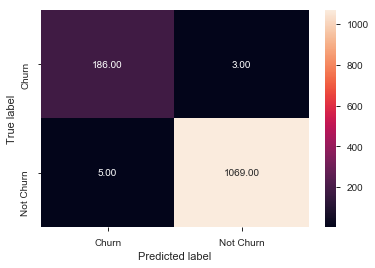

In [303]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Churn", "Not Churn"] , yticklabels = ["Churn", "Not Churn"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

VALIDATE THE MODEL (using test_df) ANDF GET THE CHURN PROBABILITIES

In [304]:
features=train_X.columns

In [305]:
# Make predictions for train
predictions_train = clf.predict(df_train[features])
probs_train = clf.predict_proba(df_train[features])
display(predictions_train)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [307]:
train_df["prob_true"] = probs_train[:, 1]

In [308]:
features1=test_X.columns

In [309]:
# Make predictions for test
predictions = clf.predict(df_test[features1])
probs = clf.predict_proba(df_test[features1])
display(predictions)

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [311]:
test_df["prob_true"] = probs[:, 1]

In [312]:
train_df.head()

,EXTRELNO,Total_No_Of_Communications,No_Of_Complaints,LANGUACODE_FR,LANGUACODE_NL,Frequency,Count_Of_Permanent_Order,Count_Of_Own_Initiative,Count_Of_Bank_Transfer,Count_Of_Unknown_Paytypecd,Total_Donation,Recency,Avg_Donation,CHURN_IND,COMMUNICATION_TYPE_BOTH_IN_OUT,COMMUNICATION_TYPE_ONLY_OUT,prob_true
1,0026419,60,0,0,1,59,0,7,52,0,3385.40,4393,57.38,0,1,0,0.0
5,0026431,57,0,0,1,15,0,1,14,0,3305.48,4642,220.37,0,0,1,0.0
7,0026443,52,0,0,1,152,152,0,0,0,3140.35,4378,20.66,0,0,1,0.0
8,0026444,61,0,0,1,153,153,0,0,0,3120.53,4378,20.40,0,0,1,0.0
9,0026446,79,0,0,1,60,60,0,0,0,3640.32,4378,60.67,0,1,0,0.0


In [313]:
test_df.head()

,EXTRELNO,Total_No_Of_Communications,No_Of_Complaints,LANGUACODE_FR,LANGUACODE_NL,Frequency,Count_Of_Permanent_Order,Count_Of_Own_Initiative,Count_Of_Bank_Transfer,Count_Of_Unknown_Paytypecd,Total_Donation,Recency,Avg_Donation,CHURN_IND,COMMUNICATION_TYPE_BOTH_IN_OUT,COMMUNICATION_TYPE_ONLY_OUT,prob_true
179,0027029,76,1,0,1,18,0,1,17,0,3894.98,4629,216.39,0,1,0,0.666667
841,0029468,109,0,0,1,266,0,21,245,0,5269.39,4373,19.81,0,1,0,0.500000
1579,0032313,264,0,0,1,64,0,1,63,0,14123.94,4597,220.69,0,1,0,0.833333
2136,0034186,28,0,0,1,53,0,14,39,0,951.24,4384,17.95,0,0,1,0.166667
2718,0036305,66,0,0,1,49,49,0,0,0,2984.46,4378,60.91,0,1,0,0.000000


Concatination of test and train dataset to extract the probabilities for all the customers and derive the
prediction

In [314]:
frames = [train_df, test_df]
prediction_df = pd.concat(frames)

In [315]:
prediction_df.to_csv("Fundraising-CHURN-Prediction.csv")

Getting the Prediction probability of Active Customers Only
Since we are interested to prevent existing active customer from churning; 
we would like to cultivate on the active customer data only

In [316]:
prediction_of_actve_df = prediction_df[prediction_df.CHURN_IND == 0]

In [317]:
prediction_of_actve_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7010 entries, 1 to 26595
Data columns (total 17 columns):
EXTRELNO                          7010 non-null object
Total_No_Of_Communications        7010 non-null int64
No_Of_Complaints                  7010 non-null int64
LANGUACODE_FR                     7010 non-null int64
LANGUACODE_NL                     7010 non-null int64
Frequency                         7010 non-null int64
Count_Of_Permanent_Order          7010 non-null int64
Count_Of_Own_Initiative           7010 non-null int64
Count_Of_Bank_Transfer            7010 non-null int64
Count_Of_Unknown_Paytypecd        7010 non-null int64
Total_Donation                    7010 non-null float64
Recency                           7010 non-null int64
Avg_Donation                      7010 non-null float64
CHURN_IND                         7010 non-null int64
COMMUNICATION_TYPE_BOTH_IN_OUT    7010 non-null int64
COMMUNICATION_TYPE_ONLY_OUT       7010 non-null int64
prob_true              

CREATING BANDS FOR PROBABILITY OF CHURN -

0.0 - 0.3    - LOW_CHURN_PROBABILITY

 >0.3 – 0.7  - MED_CHURN_PROBABILITY

 >0.7        - HIGH_CHURN_PROBABILITY

In [318]:
def churntyp(prediction_of_actve_df):
    if ((prediction_of_actve_df.prob_true  >= 0.0) & (prediction_of_actve_df.prob_true <= 0.3)):
        return 'LOW_CHURN_PROBABILITY'
    elif ((prediction_of_actve_df.prob_true  > 0.3) & (prediction_of_actve_df.prob_true <= 0.7)):
        return 'MED_CHURN_PROBABILITY'
    else:
        return 'HIGH_CHURN_PROBABILITY'

In [319]:
prediction_of_actve_df['CHURN_BAND'] = prediction_of_actve_df.apply(churntyp,axis=1)

C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [320]:
prediction_of_actve_df.head()

,EXTRELNO,Total_No_Of_Communications,No_Of_Complaints,LANGUACODE_FR,LANGUACODE_NL,Frequency,Count_Of_Permanent_Order,Count_Of_Own_Initiative,Count_Of_Bank_Transfer,Count_Of_Unknown_Paytypecd,Total_Donation,Recency,Avg_Donation,CHURN_IND,COMMUNICATION_TYPE_BOTH_IN_OUT,COMMUNICATION_TYPE_ONLY_OUT,prob_true,CHURN_BAND
1,0026419,60,0,0,1,59,0,7,52,0,3385.40,4393,57.38,0,1,0,0.0,LOW_CHURN_PROBABILITY
5,0026431,57,0,0,1,15,0,1,14,0,3305.48,4642,220.37,0,0,1,0.0,LOW_CHURN_PROBABILITY
7,0026443,52,0,0,1,152,152,0,0,0,3140.35,4378,20.66,0,0,1,0.0,LOW_CHURN_PROBABILITY
8,0026444,61,0,0,1,153,153,0,0,0,3120.53,4378,20.40,0,0,1,0.0,LOW_CHURN_PROBABILITY
9,0026446,79,0,0,1,60,60,0,0,0,3640.32,4378,60.67,0,1,0,0.0,LOW_CHURN_PROBABILITY


In [321]:
prediction_of_actve_df.to_csv("Fundraising-CHURN-Prediction-Active-With-BAND.csv")

final

In [322]:
pd.pivot_table(prediction_of_actve_df,index=["CHURN_BAND"],values=["EXTRELNO"],aggfunc='count')

,EXTRELNO
CHURN_BAND,
HIGH_CHURN_PROBABILITY,639
LOW_CHURN_PROBABILITY,5572
MED_CHURN_PROBABILITY,799
